## Exit Survey Analysis

* We are analyzing the exit surveys from employees of the Department of Education, Training, and Employment(DETE) and the Techinical and Further Education(TAFE) Institute in Queensland, Australia.

* We are going to analyze the data and answer these questions:

1.  Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?  What about employees who have been there longer?
2.  Are younger employees resigning due to some kind of dissatisfaction?  What about older employees?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)


* The updated dataframes above have removed columns that are not needed for this analysis

In [5]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [6]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

In [8]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

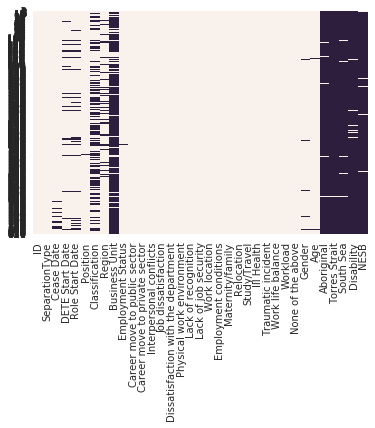

In [9]:
sns.heatmap(dete_survey_updated.isnull(),cbar=False)

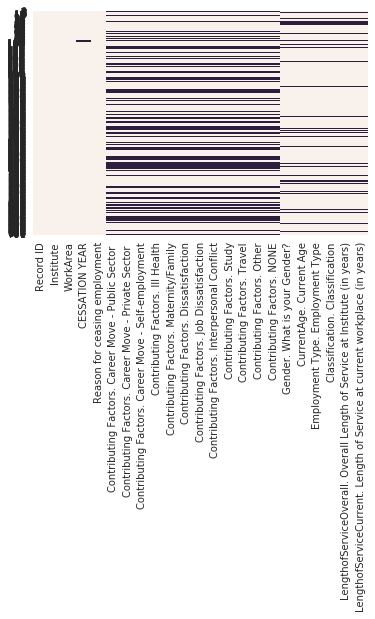

In [10]:
sns.heatmap(tafe_survey_updated.isnull(),cbar=False)

Observations in non-updated dataframes:
* Certain columns for DETE data show mostly null values:
    Aboriginal                             806
    Torres Strait                          819
    South Sea                              815
    Disability                             799
    NESB                                   790
* Certain columns for TAFE data show more common null values:
    Contributing Factors. Career Move - Public Sector                                                                                                                265
    Contributing Factors. Career Move - Private Sector                                                                                                               265
    Contributing Factors. Career Move - Self-employment                                                                                                              265
    Contributing Factors. Ill Health                                                                                                                                 265
    Contributing Factors. Maternity/Family                                                                                                                           265
    Contributing Factors. Dissatisfaction                                                                                                                            265
    Contributing Factors. Job Dissatisfaction                                                                                                                        265
    Contributing Factors. Interpersonal Conflict                                                                                                                     265
    Contributing Factors. Study                                                                                                                                      265
    Contributing Factors. Travel                                                                                                                                     265
    Contributing Factors. Other                                                                                                                                      265
    Contributing Factors. NONE                                                                                                                                       265
    Main Factor. Which of these was the main factor for leaving?                                                                                                     589
* Certain columns in both dataframes are not needed for this analysis
* Many similar columns but names different


In [12]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
    

In [16]:
tafe_survey_updated.rename(columns={'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'},inplace=True)

In [17]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [18]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In order to sync the headings of similar data columns, I renamed the headings to a consistent name between the two datasets

In [19]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [21]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

In [23]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype']=='Resignation-Other reasons') | (dete_survey_updated['separationtype']=='Resignation-Other employer') | (dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')].copy()

* Selected only the records with 'separationtype' corresponding to Resignation for both datasets

In [34]:
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [35]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'[0-9]*[0-9]*\/*([0-9]{4})',expand=False).astype('float')

In [36]:
dete_resignations['cease_date'].value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

In [40]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending=True)

 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64

In [39]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=True)

 2009.0      2
 2010.0     68
 2011.0    116
 2012.0     94
 2013.0     55
NaN          5
Name: cease_date, dtype: int64

Observations:
Noticed the spread of resignations in DETE data between 2006-2013 while TAFE data only has between 2009 and 2013
DETE data for start dates are found between 1963 and 2013
5 null values in TAFE and 28 null values in DETE 

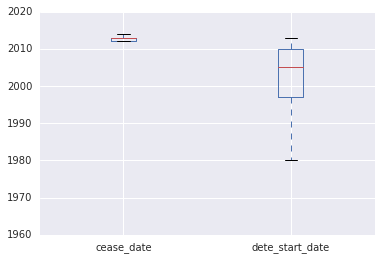

In [44]:
dete_resignations.boxplot(column=['cease_date','dete_start_date'])

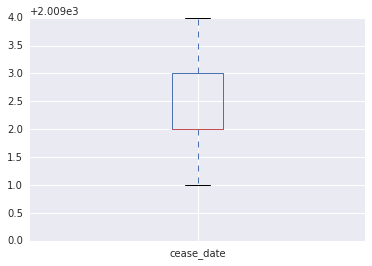

In [47]:
tafe_resignations.boxplot(column='cease_date')

In [50]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

Created new column 'institute service' in DETE resignations dateframe to show years in service

In [53]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [54]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [59]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
    

In [61]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1,skipna=False)

In [62]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].any(axis=1,skipna=False)

In [63]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

Created a dissatisfied column in both DETE and TAFE dataframes which held either True, False, or NaN if any contributing dissatisfaction existed to cause the employee to cease employment.  This makes it much easier to link both data sets later.

In [64]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [70]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up])

In [96]:
combined_updated = combined.dropna(axis=1,thresh=162)
combined_updated_copy = combined_updated.copy()

Combined both datasets and limited to only keeping the columns with more than 162 non-null values.

In [103]:
combined_updated_copy['institute_service'] = combined_updated_copy['institute_service'].astype('str').str.strip().str.replace(r'(More|Less) than ','').str.replace(r' years*','').str.replace(r'[1]*[1357]-','').astype('float')

In [105]:
def career_stage(value):
    if pd.isnull(value):
        return value
    elif value < 3:
        return "New"
    elif value >= 3 and value <=6:
        return "Experienced"
    elif value >=7 and value <=10:
        return "Established"
    elif value >=11:
        return "Veteran"
combined_updated_copy['service_cat'] = combined_updated_copy['institute_service'].apply(career_stage)

In [106]:
combined_updated_copy['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

Created a new field called service_cat which categorized all of the different values for institute_service into 4 categories

In [107]:
combined_updated_copy['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [109]:
combined_updated_copy['dissatisfied'].fillna(False,inplace=True)

In [110]:
combined_updated_copy.pivot_table(values='dissatisfied',index='service_cat')

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


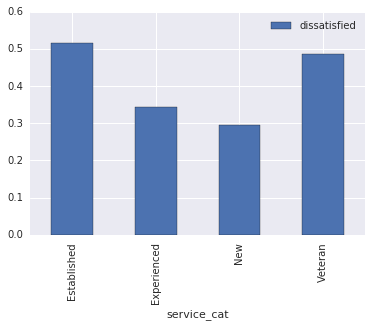

In [111]:
combined_updated_copy.pivot_table(values='dissatisfied',index='service_cat').plot(kind='bar')

It appears that the employees leaving that left due to dissatisfaction were more established or veteran.